# Twitter sentiment analysis using nltk package and naive bayes [related to Covid-19 (2020-07-24 to 2020-08-30)]
------------------

### Importing the Modules

In [1]:
import pandas as pd 
import numpy as np 
from IPython.display import display

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
import os


### Importing the Dataset

In [7]:
df=pd.read_csv('covid19_tweets.csv')
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


let's check the shape of the dataframe

In [8]:
df.shape

(10956, 13)

let's select the needed columns for our project

In [9]:
needed_columns=['user_name','date','text']
df=df[needed_columns]
df.head()

,user_name,date,text
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


change the type of some columns

In [10]:
df.user_name=df.user_name.astype('category')
df.user_name=df.user_name.cat.codes # assign a unique numerical code to each category
df.date=pd.to_datetime(df.date).dt.date

In [11]:
df.head(5)

,user_name,date,text
0,7683,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,6554,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,6531,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,7246,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,1504,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


### Picking out the tweet texts

In [12]:
texts=df.text
texts

0        If I smelled the scent of hand sanitizers toda...
1        Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2        @diane3443 @wdunlap @realDonaldTrump Trump nev...
3        @brookbanktv The one gift #COVID19 has give me...
4        25 July : Media Bulletin on Novel #CoronaVirus...
                               ...                        
10951    High tracking and testing rates have helped Ba...
10952    I don't care WHAT happens between #COVID19 and...
10953    #India’s #COVID19 tally zoomed past 13 lakhs o...
10954    India =    11.2 % +ve in testing \nUS     =   ...
10955                                                  NaN
Name: text, Length: 10956, dtype: object

### Removing URLs from tweets

In [13]:
remove_url=lambda x:re.sub(r'http\S+','',str(x))
texts_lr=texts.apply(remove_url)
texts_lr

0        If I smelled the scent of hand sanitizers toda...
1        Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2        @diane3443 @wdunlap @realDonaldTrump Trump nev...
3        @brookbanktv The one gift #COVID19 has give me...
4        25 July : Media Bulletin on Novel #CoronaVirus...
                               ...                        
10951    High tracking and testing rates have helped Ba...
10952    I don't care WHAT happens between #COVID19 and...
10953    #India’s #COVID19 tally zoomed past 13 lakhs o...
10954    India =    11.2 % +ve in testing \nUS     =   ...
10955                                                  nan
Name: text, Length: 10956, dtype: object

### Converting all tweets to lowercase

In [14]:
to_lower=lambda x: x.lower()
texts_lr_lc=texts_lr.apply(to_lower)
texts_lr_lc

0        if i smelled the scent of hand sanitizers toda...
1        hey @yankees @yankeespr and @mlb - wouldn't it...
2        @diane3443 @wdunlap @realdonaldtrump trump nev...
3        @brookbanktv the one gift #covid19 has give me...
4        25 july : media bulletin on novel #coronavirus...
                               ...                        
10951    high tracking and testing rates have helped ba...
10952    i don't care what happens between #covid19 and...
10953    #india’s #covid19 tally zoomed past 13 lakhs o...
10954    india =    11.2 % +ve in testing \nus     =   ...
10955                                                  nan
Name: text, Length: 10956, dtype: object

### Removing punctuations

In [15]:
remove_puncs= lambda x:x.translate(str.maketrans('','',string.punctuation))
texts_lr_lc_np=texts_lr_lc.apply(remove_puncs)
texts_lr_lc_np

0        if i smelled the scent of hand sanitizers toda...
1        hey yankees yankeespr and mlb  wouldnt it have...
2        diane3443 wdunlap realdonaldtrump trump never ...
3        brookbanktv the one gift covid19 has give me i...
4        25 july  media bulletin on novel coronavirusup...
                               ...                        
10951    high tracking and testing rates have helped ba...
10952    i dont care what happens between covid19 and n...
10953    india’s covid19 tally zoomed past 13 lakhs on ...
10954    india     112  ve in testing \nus        1235 ...
10955                                                  nan
Name: text, Length: 10956, dtype: object

### Removing stopwords

In [16]:
more_words=['say','going','like','U','u','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19','coronavirus', 'covid19']
stop_words=set(stopwords.words('english')) #nltk package
stop_words.update(more_words)

remove_words=lambda x: ' '.join([word for word in x.split() if word not in stop_words]) #.join is from package string
texts_lr_lc_np_ns=r=texts_lr_lc_np.apply(remove_words)
texts_lr_lc_np_ns

0        smelled scent hand sanitizers today someone pa...
1        hey yankees yankeespr mlb wouldnt made sense p...
2        diane3443 wdunlap realdonaldtrump trump never ...
3        brookbanktv one gift give appreciation simple ...
4        25 july media bulletin novel coronavirusupdate...
                               ...                        
10951    high tracking testing rates helped bahrain tak...
10952    dont care happens nov3rd state union obama orc...
10953    india’s tally zoomed past 13 lakhs saturday tw...
10954    india 112 testing us 1235 testing prediction i...
10955                                                  nan
Name: text, Length: 10956, dtype: object

### let's create a big list of words out of all the tweets 

In [17]:
words_list=[word for line in texts_lr_lc_np_ns for word in line.split()]
words_list[:5]

['smelled', 'scent', 'hand', 'sanitizers', 'today']

In [18]:
word_counts=Counter(words_list).most_common(50)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','frq']
display(word_df.head(5))
# px=import plotly.express
px.bar(word_df,x='word',y='frq',title='Most common words')

,word,frq
0,cases,1363
1,new,921
2,amp,653
3,people,542
4,positive,514


### put the Cleaned text in main dataframe

In [19]:
display(df.head(5))
df.text=texts_lr_lc_np_ns
display(df.head(5))

,user_name,date,text
0,7683,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,6554,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,6531,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,7246,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,1504,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


,user_name,date,text
0,7683,2020-07-25,smelled scent hand sanitizers today someone pa...
1,6554,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...
2,6531,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...
3,7246,2020-07-25,brookbanktv one gift give appreciation simple ...
4,1504,2020-07-25,25 july media bulletin novel coronavirusupdate...


### addtional clean

In [20]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['text'] = df['text'].apply(lambda x: clean_text(x))
display(df)

,user_name,date,text
0,7683,2020-07-25,smelled scent hand sanitizers today someone pa...
1,6554,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...
2,6531,2020-07-25,wdunlap realdonaldtrump trump never claimed h...
3,7246,2020-07-25,brookbanktv one gift give appreciation simple ...
4,1504,2020-07-25,july media bulletin novel coronavirusupdates ...
...,...,...,...
10951,2582,2020-07-25,high tracking testing rates helped bahrain tak...
10952,4165,2020-07-25,dont care happens state union obama orchestra...
10953,4500,2020-07-25,india’s tally zoomed past lakhs saturday two ...
10954,2883,2020-07-25,india testing us testing prediction india co...


In [21]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [22]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))
display(df)

,user_name,date,text
0,7683,2020-07-25,smelled scent hand sanitizers today someone pa...
1,6554,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...
2,6531,2020-07-25,wdunlap realdonaldtrump trump never claimed h...
3,7246,2020-07-25,brookbanktv one gift give appreciation simple ...
4,1504,2020-07-25,july media bulletin novel coronavirusupdates ...
...,...,...,...
10951,2582,2020-07-25,high tracking testing rates helped bahrain tak...
10952,4165,2020-07-25,dont care happens state union obama orchestra...
10953,4500,2020-07-25,india’s tally zoomed past lakhs saturday two ...
10954,2883,2020-07-25,india testing us testing prediction india co...


# Sentiment Analysis 

Getting the polarity scores for each tweet

In [23]:
sid=SentimentIntensityAnalyzer()
ps=lambda x:sid.polarity_scores(x)
sentiment_scores=df.text.apply(ps)
sentiment_scores

0        {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...
1        {'neg': 0.11, 'neu': 0.709, 'pos': 0.181, 'com...
2        {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...
3        {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
4        {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...
                               ...                        
10951    {'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'comp...
10952    {'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'comp...
10953    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10954    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10955    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: text, Length: 10956, dtype: object

In [24]:
sentiment_df=pd.DataFrame(data=list(sentiment_scores))
display(sentiment_df)

,neg,neu,pos,compound
0,0.000,0.758,0.242,0.4939
1,0.110,0.709,0.181,0.2263
2,0.000,0.815,0.185,0.2057
3,0.000,0.563,0.437,0.7351
4,0.000,0.753,0.247,0.3182
...,...,...,...,...
10951,0.206,0.794,0.000,-0.3818
10952,0.273,0.727,0.000,-0.3875
10953,0.000,1.000,0.000,0.0000
10954,0.000,1.000,0.000,0.0000


### Labeling the scores based on the compound polarity value

In [25]:
labelize=lambda x:'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label']=sentiment_df.compound.apply(labelize)
display(sentiment_df.head(10))

,neg,neu,pos,compound,label
0,0.000,0.758,0.242,0.4939,positive
1,0.110,0.709,0.181,0.2263,positive
2,0.000,0.815,0.185,0.2057,positive
3,0.000,0.563,0.437,0.7351,positive
4,0.000,0.753,0.247,0.3182,positive
5,0.286,0.714,0.000,-0.4951,negative
6,0.000,1.000,0.000,0.0000,neutral
7,0.000,1.000,0.000,0.0000,neutral
8,0.000,0.426,0.574,0.6597,positive
9,0.000,0.769,0.231,0.2732,positive


### let's join two dataframes

In [26]:
display(df.head(5))
data=df.join(sentiment_df.label)
display(data.head(5))

,user_name,date,text
0,7683,2020-07-25,smelled scent hand sanitizers today someone pa...
1,6554,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...
2,6531,2020-07-25,wdunlap realdonaldtrump trump never claimed h...
3,7246,2020-07-25,brookbanktv one gift give appreciation simple ...
4,1504,2020-07-25,july media bulletin novel coronavirusupdates ...


,user_name,date,text,label
0,7683,2020-07-25,smelled scent hand sanitizers today someone pa...,positive
1,6554,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...,positive
2,6531,2020-07-25,wdunlap realdonaldtrump trump never claimed h...,positive
3,7246,2020-07-25,brookbanktv one gift give appreciation simple ...,positive
4,1504,2020-07-25,july media bulletin novel coronavirusupdates ...,positive


### Plotting the sentiment score counts

In [27]:
counts_df=data.label.value_counts().reset_index()
display(counts_df)

,index,label
0,positive,4463
1,neutral,3825
2,negative,2668


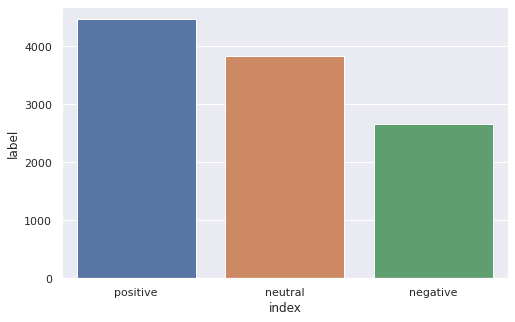

In [28]:
plt.figure(figsize=(8,5)) 
sns.barplot(x='index',y='label',data=counts_df)

# Naive Bayes 

In [29]:
tweets_df=data[['label','text']]
tweets_df['length']=tweets_df['text'].apply(len)
tweets_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,label,text,length
0,positive,smelled scent hand sanitizers today someone pa...,78
1,positive,hey yankees yankeespr mlb wouldnt made sense p...,68
2,positive,wdunlap realdonaldtrump trump never claimed h...,66
3,positive,brookbanktv one gift give appreciation simple ...,70
4,positive,july media bulletin novel coronavirusupdates ...,79
...,...,...,...
10951,negative,high tracking testing rates helped bahrain tak...,68
10952,negative,dont care happens state union obama orchestra...,55
10953,neutral,india’s tally zoomed past lakhs saturday two ...,73
10954,neutral,india testing us testing prediction india co...,61


In [30]:
tweets_df.describe()

,length
count,10956.000000
mean,71.174608
std,17.986427
min,0.000000
25%,62.000000
50%,74.000000
75%,83.000000
max,116.000000


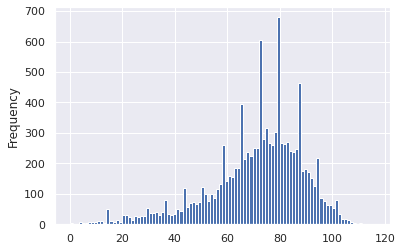

In [31]:
# hist plot for the length of tweets
tweets_df['length'].plot(bins=100,kind='hist')

In [32]:
positive=tweets_df[tweets_df.label=='positive']
negative=tweets_df[tweets_df.label=='negative']

In [33]:
positive.head()

,label,text,length
0,positive,smelled scent hand sanitizers today someone pa...,78
1,positive,hey yankees yankeespr mlb wouldnt made sense p...,68
2,positive,wdunlap realdonaldtrump trump never claimed h...,66
3,positive,brookbanktv one gift give appreciation simple ...,70
4,positive,july media bulletin novel coronavirusupdates ...,79


In [34]:
sentence_as_one_string = " ".join(tweets_df.text)

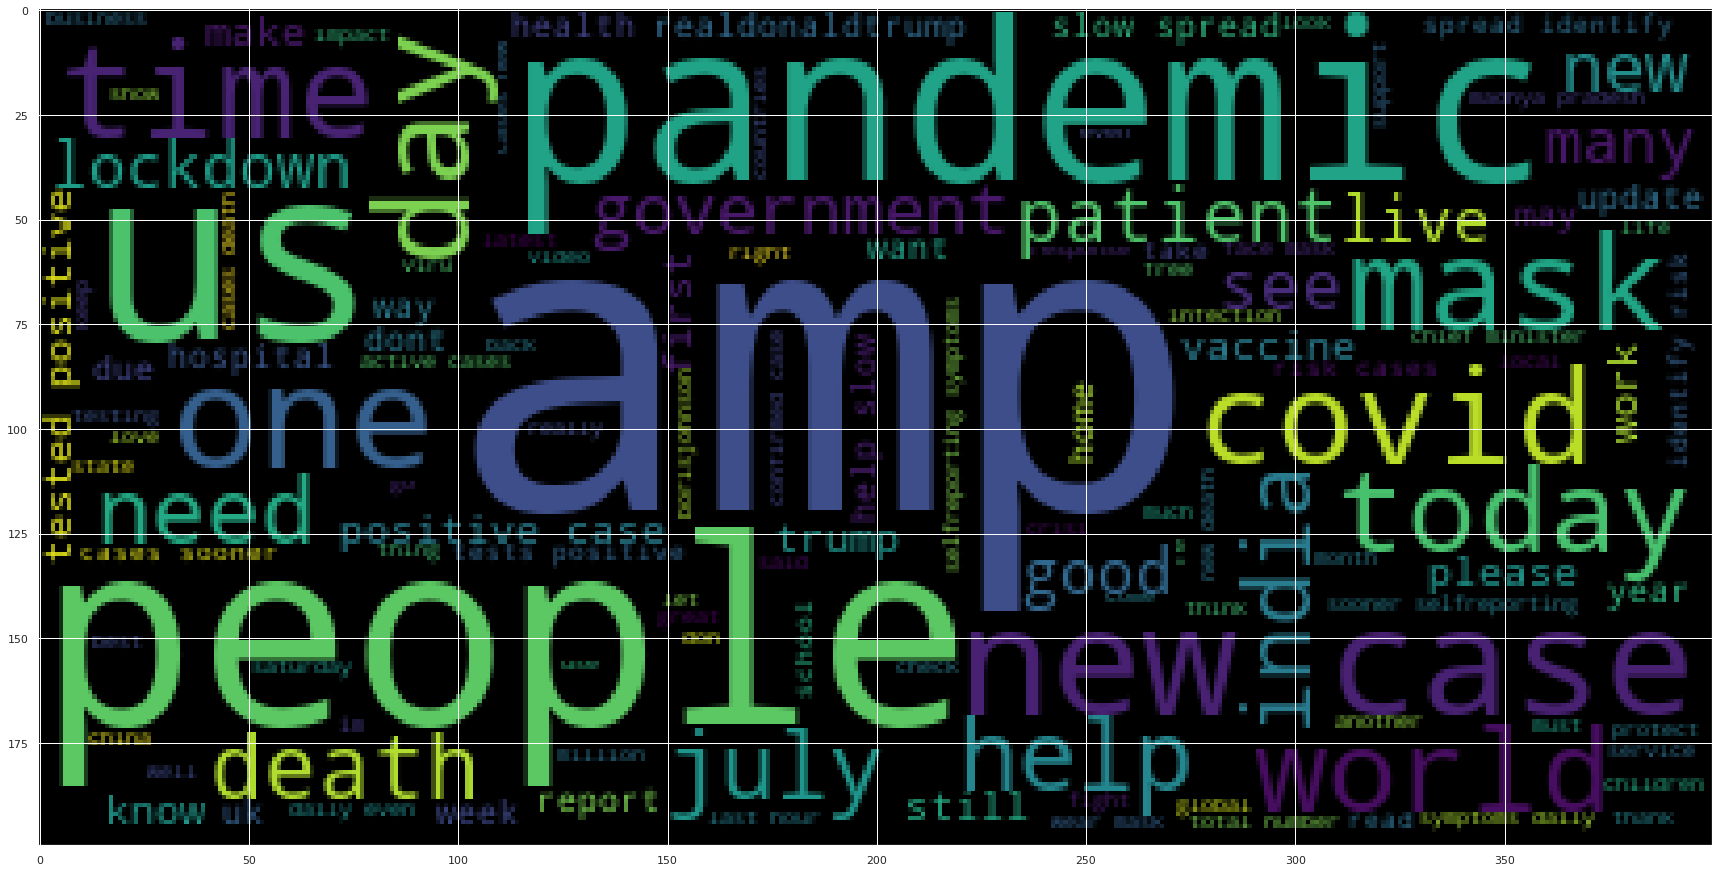

In [35]:
from wordcloud import WordCloud

plt.figure(figsize=(30,30))
plt.imshow(WordCloud().generate(sentence_as_one_string))

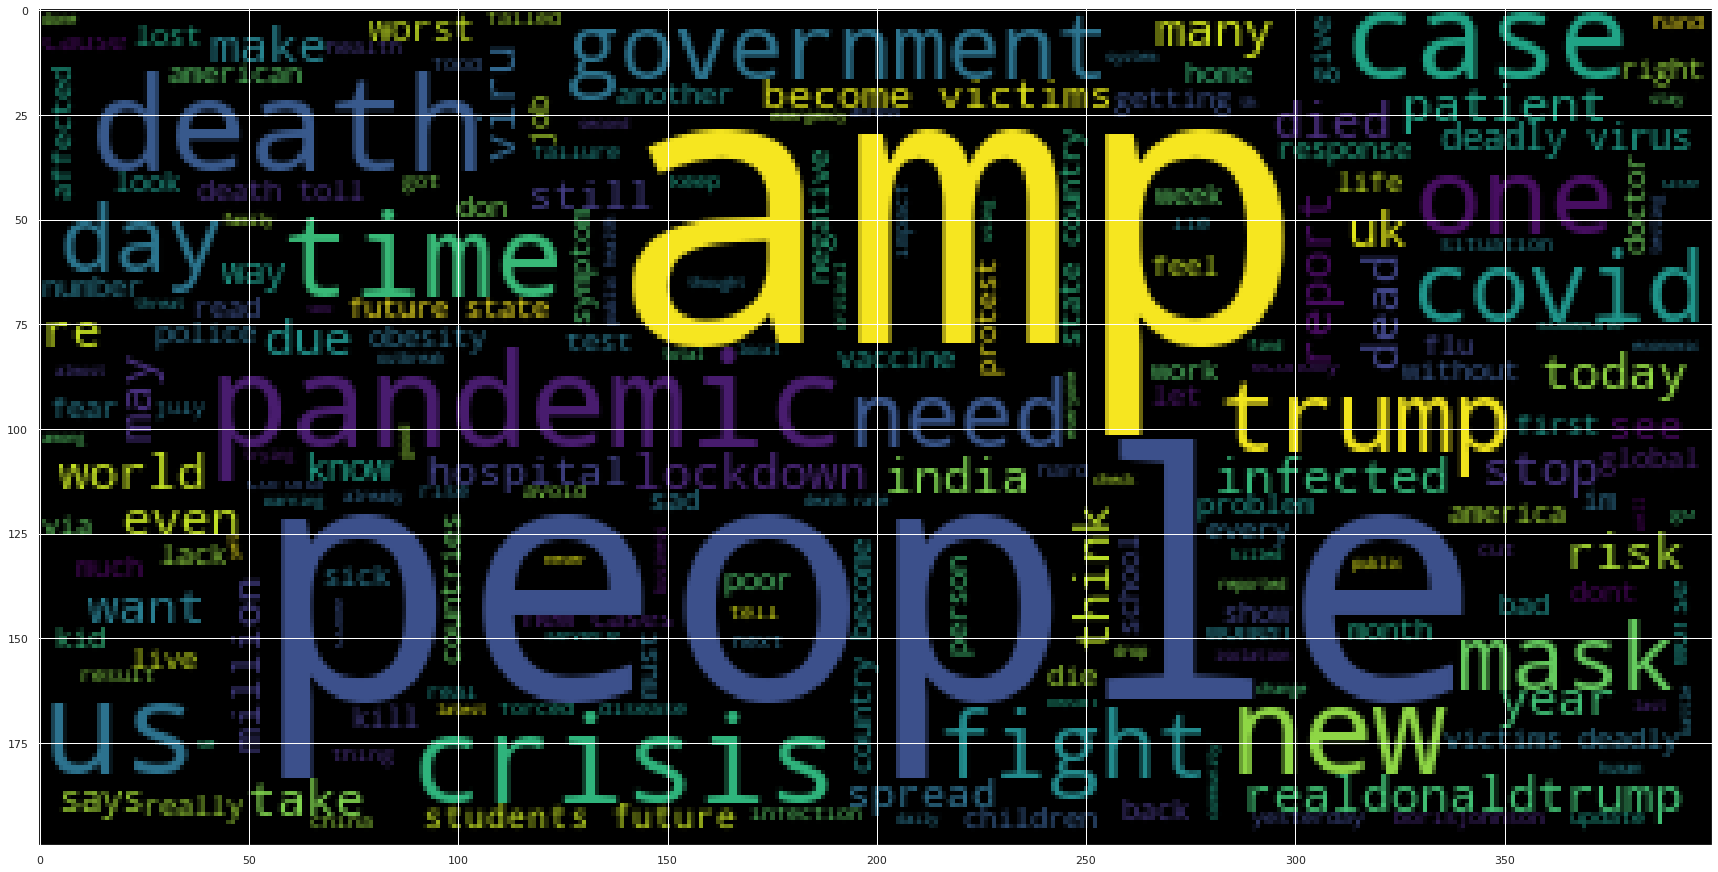

In [36]:
# negative wordcloud
negative_list=negative.text.tolist()
negative_as_one_string = " ".join(negative_list)

plt.figure(figsize=(30,30))
plt.imshow(WordCloud().generate(negative_as_one_string))


# Count Vectorization

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
vectorizer= CountVectorizer()

sample_data=tweets_df.text[0:3]
X=vectorizer.fit_transform(sample_data)

In [39]:
print(vectorizer.get_feature_names())
print(X.toarray())

['claim', 'claimed', 'effort', 'hand', 'hey', 'hoax', 'intoxicated', 'made', 'mlb', 'never', 'past', 'pay', 'players', 'realdonaldtrump', 'respects', 'sanitizers', 'scent', 'sense', 'smelled', 'someone', 'that', 'think', 'to', 'today', 'trump', 'wdunlap', 'would', 'wouldnt', 'yankees', 'yankeespr']
[[0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1]
 [1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0]]


# Pipeline to remove punc,wtop-words and tokenization and count vectorizer

In [40]:
def message_cleaning(message):
    punc_removed=[char for char in message if char not in string.punctuation]
    punc_removed_join=''.join(punc_removed)
    punc_removed_join_clean=[word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean

In [41]:
tweets_df_clean=tweets_df.text.apply(message_cleaning)

In [43]:
print(tweets_df_clean[15])

['nagaland', 'police', 'awareness', 'city', 'tower', 'junction', 'dimapur', 'keepsocialdistance…']


In [49]:
vectorizer=CountVectorizer(analyzer=message_cleaning)
tweets_countvectorizer=CountVectorizer(analyzer=message_cleaning,dtype='uint8').fit_transform(tweets_df.text).toarray()

In [50]:
tweets_countvectorizer.shape

(10956, 23120)

In [53]:
X=tweets_countvectorizer
y=tweets_df.label

# Build a Naive Bayes Classifier

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [97]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# NB Performance

In [98]:
from sklearn.metrics import classification_report,confusion_matrix

[[206  22  63]
 [ 53 242  80]
 [ 48  27 355]]


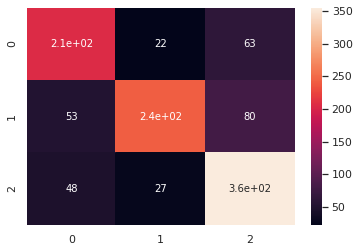

In [99]:
labels = ['negative', 'neutral','positive']
y_predict_test=NB_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test,labels)
sns.heatmap(cm,annot=True)
print(cm)

In [100]:
import collections
collections.Counter(y_test)

Counter({'negative': 291, 'neutral': 375, 'positive': 430})

In [101]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

    negative       0.67      0.71      0.69       291
     neutral       0.83      0.65      0.73       375
    positive       0.71      0.83      0.77       430

    accuracy                           0.73      1096
   macro avg       0.74      0.73      0.73      1096
weighted avg       0.74      0.73      0.73      1096



### group number of counts by
<li>date
<li>positive,neutral,negative

In [102]:
data_agg=data[['user_name','date','label']]
display(data_agg.head(5))

,user_name,date,label
0,7683,2020-07-25,positive
1,6554,2020-07-25,positive
2,6531,2020-07-25,positive
3,7246,2020-07-25,positive
4,1504,2020-07-25,positive


In [103]:
data_agg=data_agg.groupby(['date','label'])
display(data_agg.head(5))

,user_name,date,label
0,7683,2020-07-25,positive
1,6554,2020-07-25,positive
2,6531,2020-07-25,positive
3,7246,2020-07-25,positive
4,1504,2020-07-25,positive
5,7819,2020-07-25,negative
6,7278,2020-07-25,neutral
7,1705,2020-07-25,neutral
10,6852,2020-07-25,negative
11,1450,2020-07-25,neutral


In [104]:
data_agg=data_agg.count()
display(data_agg.head(5))

user_name
date       label              
2020-07-25 negative       2668
           neutral        3824
           positive       4463

In [105]:
data_agg=data_agg.reset_index()
display(data_agg.head(5))

,date,label,user_name
0,2020-07-25,negative,2668
1,2020-07-25,neutral,3824
2,2020-07-25,positive,4463


### actually the 'user_name' is the count of users, so need to change the column name

In [106]:
data_agg.columns=['date','label','counts']
display(data_agg.head())

,date,label,counts
0,2020-07-25,negative,2668
1,2020-07-25,neutral,3824
2,2020-07-25,positive,4463


In [107]:
px.line(data_agg,x='date',y='counts',color='label',
       title='Daily Tweet Sentimental Analysis')

In [108]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))
display(df)

,user_name,date,text
0,7683,2020-07-25,smelled scent hand sanitizers today someone pa...
1,6554,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...
2,6531,2020-07-25,wdunlap realdonaldtrump trump never claimed h...
3,7246,2020-07-25,brookbanktv one gift give appreciation simple ...
4,1504,2020-07-25,july media bulletin novel coronavirusupdates ...
...,...,...,...
10951,2582,2020-07-25,high tracking testing rates helped bahrain tak...
10952,4165,2020-07-25,dont care happens state union obama orchestra...
10953,4500,2020-07-25,india’s tally zoomed past lakhs saturday two ...
10954,2883,2020-07-25,india testing us testing prediction india co...
